## Figures for *"Bundling Measures for Food Systems Transformation: a global, multimodel assessment"*


In [1]:
import sys
from os.path import join as pjoin
sys.path.append("..")
import applepy as apy
from applepy.utils.helper import *
from applepy.utils.calculations import basic

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import matplotlib.image as image
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from tqdm import tqdm
from random import randrange
from matplotlib.patches import FancyArrowPatch
import matplotlib as mpl
from matplotlib.gridspec import GridSpec,GridSpecFromSubplotSpec
import random
import statistics as stat
from datetime import datetime
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset
import math
from brokenaxes import brokenaxes
from matplotlib.patches import ConnectionPatch

mpl.rc('font',family='Roboto')
from matplotlib.colors import LogNorm
import matplotlib.lines as mlines
import time

import string


## Setup

In [2]:
fp = '../data/global-paper_dataset.csv' # or change this path to where the global dataset is located
df = pd.read_csv(fp,index_col=0)
df.head()

,model,scenario,region,variable,item,unit,year,value,BAU_ref_year,percent_change_BAU_ref_year,diff_BAU_ref_year,percent_change_BAU,diff_BAU,percent_change_ELM,diff_ELM
0,GLOBIOM,BAU,WLD,ANNR_prod,TOT,Absolute number,2020.0,1.515144e+09,2020.0,0.000000,0.0,0.000000,0.0,0.200102,3025784.0
1,GLOBIOM,BAU,WLD,ANNR_prod,TOT,Absolute number,2050.0,1.841336e+09,2020.0,21.528765,326191883.0,0.000000,0.0,64.673304,723160941.0
2,GLOBIOM,BAU_DIET,WLD,ANNR_prod,TOT,Absolute number,2020.0,1.515144e+09,2020.0,0.000000,0.0,0.000000,0.0,0.200102,3025784.0
3,GLOBIOM,BAU_DIET,WLD,ANNR_prod,TOT,Absolute number,2050.0,1.281021e+09,2020.0,-15.452194,-234123055.0,-30.429799,-560314938.0,14.563548,162846003.0
4,GLOBIOM,BAU_MITI,WLD,ANNR_prod,TOT,Absolute number,2020.0,1.512119e+09,2020.0,-0.199703,-3025784.0,-0.199703,-3025784.0,0.000000,0.0


In [3]:
# load decompositon analysis data 
dc_fp = '../data/global-paper_decomposition_long-format.csv' # or change this path to where the decomposition data is located (long format)
dc_df_l = pd.read_csv(dc_fp,index_col=0)
dc_df_l.head()

,model,region,variable,item,unit,year,driver,normalized,value_type,effect,value
0,AIM,ANZ,FEXP,TOT,USD/capita,2050.0,DIET,True,value,individual,2.017251
1,AIM,ANZ,FEXP,TOT,USD/capita,2050.0,DIET,False,value,individual,-159.546138
2,AIM,ANZ,FEXP,TOT,USD/capita,2050.0,DIET,True,percent_change_BAU,individual,2.017251
3,AIM,ANZ,FEXP,TOT,USD/capita,2050.0,DIET,False,percent_change_BAU,individual,-5.808156
4,AIM,ANZ,FEXP,TOT,USD/capita,2050.0,DIET,True,percent_change_BAU_ref_year,individual,2.017251


In [4]:
# set up output directory
base_filename = fp.split('/')[-1].split('.csv')[-2]
output_dir = pjoin(os.getcwd(),'output','paper-figures',base_filename)
check_path(output_dir)

created directory: /Users/mms466/Documents/fsgc/dev/EAT-Lancet-2_modelling_data-processing-viz/jupyter-notebooks/output/paper-figures/global-paper_dataset


## Main Figures

### Figure 1 and 2: Summary 

***Figure 1 Caption***: *Percentage changes in food system indicators—food demand for agricultural commodities, agriculture producer prices, agriculture production, harvested area for crops, and crop yields—from 2020 to 2050 under a BAU scenario, and for counterfactual scenarios relative to BAU 2050, with a grey reference line connecting the BAU median (0% change point) across all panels. The dark vertical lines show the multimodel median, with median values shown to the right alongside the number of reporting models in parentheses. Coloured markers indicate individual model results, with colour intensity reflecting magnitude of change (darker shades closer to 0%, increasing saturation for larger changes, with orange indicating increases and blue indicating decreases from the reference point) The shaded region shows the full ensemble range.*

***Figure 2 Caption***: *Percentage changes in environmental indicators—non-CO2 emissions from agriculture, agricultural land, water withdrawals for crops, nitrogen use for crops, and phosphorus use for crops—from 2020 to 2050 under a BAU scenario, and for counterfactual scenarios relative to BAU 2050, with a grey reference line connecting the BAU median (0% change point) across all panels. The dark vertical lines show the multimodel median, with median values shown to the right alongside the number of reporting models in parentheses. Coloured markers indicate individual model results, with colour intensity reflecting magnitude of change (darker shades closer to 0%, increasing saturation for larger changes, with orange indicating increases and blue indicating decreases from BAU). The shaded region shows the full ensemble range.*

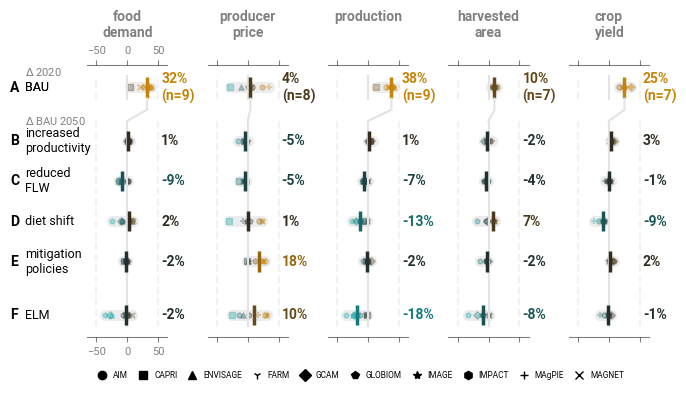

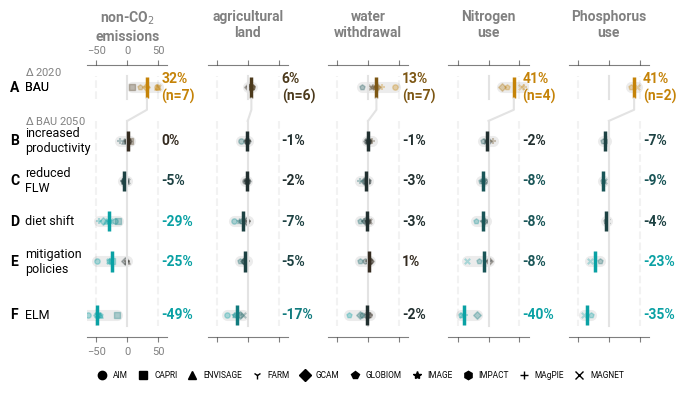

In [5]:
afont = {'fontsize' : 9, 'weight':'regular'} # scenario titles
bfont = {'fontsize' : 10, 'weight':'bold'} # medians
cfont = {'fontsize' : 8, 'weight':'regular'} #change labels
xfont = {'fontsize' : 8, 'weight':'regular'} #x labels

pfont = {'fontsize' : 10,'weight':'bold'} # title
hfont = {'fontsize' : 10,'color':'grey','weight':'bold'} # title

bg = 'white'
ax_bg = (1,1,1,0)

# create color map
max_yield_change = 25
n_colors = 14
cmap = sns.diverging_palette(196, 47, s=99,l=60,n=n_colors,sep=1,center="dark")
colorspace =np.linspace(-max_yield_change,max_yield_change,n_colors)
def get_color(value):
    return (np.abs(colorspace - value)).argmin()

sns.set_style({'axes.facecolor': ax_bg,
            'figure.facecolor':bg, 
            'font.family': ['Roboto']})

variable_sets = [{'food\ndemand': {'variable': 'FOOD',
                                  'item': 'AGR'},
                  'producer\nprice'  : {'variable':'XPRP',
                                        'item':'AGR'},
                  'production'       : {'variable':'PROD',
                                        'item':'AGR'},
                  'harvested\narea': {'variable':'AREA',
                                        'item':'CRP'},
                  'crop\nyield'          :{'variable':'YILD',
                                       'item':'CRP'}
                    },
                {'non-CO$_2$\nemissions': {'variable': 'EMIS_nonCO2',
                                           'item': 'AGR'},
                  'agricultural\nland'  : {'variable':'LAND_added',
                                        'item':'AGR_added'},
                  'water\nwithdrawal'       : {'variable':'WATR',
                                        'item':'CRP'},
                  'Nitrogen\nuse': {'variable':'FRTN',
                                        'item':'CRP'},
                  'Phosphorus\nuse'          :{'variable':'FRTP',
                                       'item':'CRP'}
                    }
                    ]
item = 'AGR'
year = 2050
region = 'WLD'
scenarios = ['BAU','BAU_PROD','BAU_WAST','BAU_DIET','BAU_MITI','ELM']
scenario_value = 'percent_change_BAU'
bau_value = 'percent_change_BAU_ref_year'
fdf = df[(df.region==region) & (df.year==year)]

box_width = 0.2
y_pad = 0.25
x_axis_alpha = 0.5
y_axis_pad = 0.5
y_spacing = 0.9
y_spacing_m = 1.2

ys = np.hstack([[0],np.cumsum(np.hstack([[y_spacing_m],[y_spacing for x in range(3)],[y_spacing_m]]))])
y_max = np.max(ys)
zero_line_color = '#e3e3e3'

scenario_text = {'BAU':'BAU', 
                   'EL2': 'EL2',
                   'ELM': 'ELM',
                   'BAU_DIET':'diet shift',
                   'BAU_PROD':'increased\nproductivity',
                   'BAU_WAST':'reduced\nFLW',
                   'BAU_MITI':'mitigation\npolicies'}

models_markers = {
    'AIM': 'o',        # circle
    'CAPRI': 's',      # square
    'ENVISAGE': '^',   # triangle_up
    'FARM': '1',       # three point asterisk
    'GCAM': 'D',       # diamond
    'GLOBIOM': 'p',    # pentagon
    'IMAGE': '*',      # star
    'IMPACT': 'h',     # hexagon
    'MAgPIE': '+',     # plus
    'MAGNET': 'x'      # x
}

scenario_labels = [''] + [scenario_text[s] for i,s in enumerate(scenarios)]
neg_color = 'steelblue'
shade_color = 'grey'
median_pad = 0.03
rows = 1
fig_width = 7.25
fig_height = 4

for v, variables in enumerate(variable_sets):
    
    scenario_num = 0
    cols = len(variables)
    subplot_width = fig_width/cols
    fig = plt.figure(figsize=(subplot_width*cols,fig_height))

    for col, variable_name in enumerate(variables):
        variable = variables[variable_name]['variable']
        item = variables[variable_name]['item']

        ax = plt.subplot(rows,cols,col+1)
        # guide line for BAU 
        plt.plot([0,0],[y_pad,0-y_pad],color=zero_line_color,alpha=1)
        plt.plot([50,50],[y_pad,0-y_pad],'k--',alpha=0.05)
        plt.plot([-50,-50],[y_pad,0-y_pad],'k--',alpha=0.05)

        # guide line for other scenarios 
        plt.plot([0,0],[1-y_pad,y_max+y_pad],color=zero_line_color,alpha=1)
        plt.plot([50,50],[1-y_pad,y_max+y_pad],'k--',alpha=0.05)
        plt.plot([-50,-50],[1-y_pad,y_max+y_pad],'k--',alpha=0.05)

        num_model  = 0

        for y, scenario in zip(ys,scenarios):
            plot_data = []
            if scenario=='BAU':
                value = bau_value
            else:
                value = scenario_value

            for i, model in enumerate(df.model.unique()):

                val = fdf[(fdf.variable==variable) &
                        (fdf.model==model) &
                        (fdf.item==item) &
                        (fdf.scenario==scenario)][value].values
                
                if len(val)>0:
                    plot_data.append(val[0])
                    color = cmap[get_color(val[0])]
                    plt.scatter(val[0],y,marker=models_markers[model],color=color,alpha=0.3,s=15)

            median_color = cmap[get_color(np.nanmedian(plot_data))]

            plt.plot([np.nanmin(plot_data),np.nanmax(plot_data)],[y,y],zorder=0,color=shade_color,alpha=0.15,linewidth=8,solid_capstyle='round')
            plt.vlines(np.nanmedian(plot_data),y-box_width-median_pad,y+box_width+median_pad,color = median_color,**{'linewidth':2.5})

            # annotate with %change, if its nan, drop it
            try:
                color = cmap[get_color(np.nanmedian(plot_data))]
                if scenario=='BAU':
                    annotate_text = f"{int(np.rint(np.nanmedian(plot_data)))}%\n(n={np.sum(~np.isnan(plot_data))})"
                else:
                    annotate_text = f"{int(np.rint(np.nanmedian(plot_data)))}%"
                    
                plt.annotate(annotate_text,(55,y),color=color,va='center',**bfont)
            except Exception as e:
                print(item,variable,e)

            ## annotate with a panel letter
            if col==0:
                px = -190 #186.61290322580646 # this is from running it once, getting the y-label position in data coordinates (to adjust the y-label position based on all the labels, not just the first one)
                annotate_text = f'{string.ascii_uppercase[scenario_num]}'
                ax.text(px,y,annotate_text,ha='left',va='center', **pfont)
                scenario_num+=1

            if scenario=='BAU':
                # draw line from BAU to other scenarios
                plt.plot([np.nanmedian(plot_data),np.nanmedian(plot_data),0],[y_pad,0.5,1-y_pad],color=zero_line_color)
            
            num_model = np.max(np.hstack([[num_model],len(plot_data)]))
                
        ax.set_ylim(y_max+y_axis_pad,0-y_axis_pad)
        ax.set_xlim(-65,65)

        # ylbl = ax.set_ylabel('')
        # px,py = ax.transData.inverted().transform(ylbl.get_position())
        # print(px)

        # formatting the first column with annotations, and clean up the rest
        if col>0:
            sns.despine(left=True,top=False,ax=ax)
            ax.set_yticks(list(ys))
            ax.set_yticklabels([])
            ax.tick_params(axis='y',length=0)
            ax.set_xticklabels([])
            ax.spines['bottom'].set_alpha(x_axis_alpha)
            ax.spines['top'].set_alpha(x_axis_alpha)
            ax.tick_params(axis='x',colors=[0,0,0,x_axis_alpha],bottom=True,top=True,labelbottom=True, labeltop=True)


        else:
            cx = -165 #-186.61290322580646 ## this is from running it once, getting the y-label position in data coordinates (to adjust the y-label position based on all the labels, not just the first one)

            # annotation for BAU (change from current state)
            annotate_text = f"$\Delta$ 2020"
            ax.text(cx,-0.35,annotate_text,ha='left',va='center',color='grey', **cfont)
            # annotation for scenarios (change from BAU)
            annotate_text = f"$\Delta$ BAU 2050"
            ax.text(cx,ys[1]-0.45,annotate_text,ha='left',va='center',color='grey', **cfont)

            #scenario labels  
            ax.tick_params(axis='y',length=0)
            ax.set_yticks([0] + list(ys))
            ax.set_yticklabels(scenario_labels, va='center',ha='left', **afont)
            ax.tick_params(axis='y', pad=45)


            # x tick labels
            ax.spines['bottom'].set_alpha(x_axis_alpha)
            ax.spines['top'].set_alpha(x_axis_alpha)
            ax.tick_params(axis='x',colors=[0,0,0,x_axis_alpha],bottom=True,top=True,labelbottom=True, labeltop=True)
            plt.setp(ax.get_xticklabels(), alpha=x_axis_alpha,**xfont)

            sns.despine(left=True,top=False)


        ax.set_title(f'{variable_name}',pad=40,horizontalalignment='center', verticalalignment='top',**hfont)

    legend_elements = []
    for model, marker in models_markers.items():
        legend_elements.append(mlines.Line2D([], [], color='black', marker=marker, 
                                        linestyle='None', markersize=6, label=model))
    legend = fig.legend(handles=legend_elements, ncol=10, loc='lower center', frameon=False,bbox_to_anchor=(0.5, 0.075), 
                        columnspacing=0.8,handletextpad=0.3, fontsize=6)
    plt.subplots_adjust(wspace=0.5,bottom=0.2)

    save_name = f'{base_filename}_summary-fig_{region}-{"_".join([variables[v]["variable"]+"-"+variables[v]["item"] for v in variables])}-{time.strftime("%Y%m%d", time.localtime())}.png'
    plt.savefig(pjoin(output_dir,save_name),transparent=True,bbox_inches='tight', dpi=300)

    save_name = f'{base_filename}_summary-fig_{region}-{"_".join([variables[v]["variable"]+"-"+variables[v]["item"] for v in variables])}-{time.strftime("%Y%m%d", time.localtime())}.pdf'
    plt.savefig(pjoin(output_dir,save_name),transparent=True,bbox_inches='tight', dpi=300)

### Figure 3: Decomposition

***Figure 3 Caption***: *The decomposed impacts of key food systems transformation measures within ELM compared with BAU 2050. Median cumulative global impacts of MITI, DIET, PROD, and WAST within ELM as changes from BAU 2050 are shown for (A) non-CO2 emissions, (B) agricultural land, (C) water use for crops, and (D) agriculture producer prices. Individual model results are indicated by model-specific markers. The impacts of these measures on average agriculture producer prices are shown in four regions: (E) sub-Saharan Africa, (F) India, (G) Brazil, and (H) Europe. *

In [6]:
def plot_decomposition_bar(region,variable,ax,):
    ax_bg = '#F1F1F1' #cdcdd4'
    scatter_alpha = 0.3
    scatter_size = 15
    box_width = 0.35
    elm_x = 0
    box_gap = 0.05
    elm_gap = 0.35
    x_gap = box_width/2+0.1

    zero_line = 0
    x_ticks = []
    #########
    ## ELM ##
    #########
    ffdf = fdf[(fdf.driver=='MITI') & #random driver, all the ELMs are the same 
                (fdf.effect=='ELM') &
                (fdf.variable==variable) &
                (fdf.region==region)]
    model_median = ffdf['value'].median()
    model_vals = ffdf.value.values

    # draw bar centered at x, with width box_width
    color=driver_style['ELM']
    x = elm_x

    rect = patches.Rectangle((x-(box_width/2),0),width = box_width,height = model_median,alpha=0.5,linewidth=0,color=color)
    ax.add_patch(rect)

    for model in ffdf.model.unique():
        plt.scatter(x,ffdf[ffdf.model==model].value.values,color=color, marker=models_markers[model],alpha=scatter_alpha,s=scatter_size)

    annotate_text = f"{int(np.round(model_median,0))}%"
    if np.sign(model_median) == 1:
        va = 'top'
    else:
        va= 'bottom'
    ax.annotate(annotate_text,(x,(zero_line)-5*(np.sign(model_median))),color=color,va=va,ha='center',**bfont)
    x_ticks.append(x)
    zero_line = 0

    box_x = elm_x+(box_width/2)+elm_gap
    
    for d,driver in enumerate(driver_order):
        
        ##############################
        ## TOTAL EFFECT: COLORED BOX##
        ##############################
        effect = 'total'
        ffdf = fdf[(fdf.driver==driver) &
                (fdf.effect==effect) &
                (fdf.variable==variable) &
                (fdf.region==region)]
        model_median = ffdf['value'].median()
        model_vals = ffdf.value.values+zero_line

        # draw bar centered at x, with width box_width
        color = driver_style[driver]
        x = d*box_width+box_x+d*box_gap
        rect = patches.Rectangle((x-(box_width/2),zero_line),width = box_width,height = model_median,alpha=0.5,linewidth=0,color=color)
        ax.add_patch(rect)


        annotate_text = f"{int(np.round(model_median,0))}pp"
        if np.sign(model_median) == 1:
            va = 'top'
        else:
            va= 'bottom'
        ax.annotate(annotate_text,(x,(zero_line)-5*(np.sign(model_median))),color=color,va=va,ha='center',**bfont)
        x_ticks.append(x)

        # ##############################
        # ## model scatter ##
        # ##############################
        jitter = 0.1
        models = ffdf.model.unique()

        for model in models:
            #total effect
            effect = 'total'
            model_total = fdf[(fdf.driver==driver) &
                        (fdf.effect==effect) &
                        (fdf.variable==variable) &
                        (fdf.model==model) &
                        (fdf.region==region)].value.values[0]
            
            effect = 'individual'
            model_ind = fdf[(fdf.driver==driver) &
                        (fdf.effect==effect) &
                        (fdf.variable==variable) &
                        (fdf.model==model) &
                        (fdf.region==region)].value.values[0]
            

            # plot total
            ax.scatter(x, model_total,color=color,marker=models_markers[model],alpha=scatter_alpha,s=scatter_size)

    sns.despine(offset=5,ax=ax)

    ax.set_xticks(x_ticks)
    x_min = x_ticks[0]-x_gap
    x_max = x_ticks[-1]+x_gap
    ax.plot([x_min,x_max],[0,0],'k',alpha=0.5,linewidth=0.5)
    x_fill = [x_ticks[0]+(x_ticks[1]-x_ticks[0])/2,x_max]
    ax.fill_between(x_fill,-100,100,color=ax_bg,alpha=0.5,linewidth=0,zorder=0)

    ax.set_ylim([-50,50]),
    ax.set_xlim([x_min,x_max])
    ax.tick_params(axis='y',length=2, labelsize=8)
    ax.tick_params(axis='x',length=2, labelsize=8)

    return x_ticks

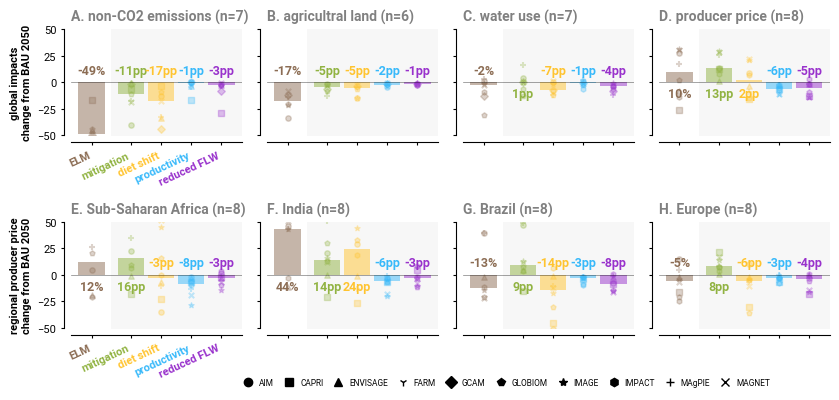

In [7]:
afont = {'fontsize' : 9, 'weight':'regular'} # scenario titles
bfont = {'fontsize' : 9, 'weight':'bold'} # medians
cfont = {'fontsize' : 8, 'weight':'regular'} #change labels
xfont = {'fontsize' : 8, 'weight':'bold'} #x labels

pfont = {'fontsize' : 10,'weight':'bold'} # title
hfont = {'fontsize' : 10,'color':'grey','weight':'bold'} # title

variables = {'non-CO2 emissions' : {'variable': 'EMIS_nonCO2',
                                        'item': 'AGR',
                                        'region': 'WLD'},
            'agricultral land' : {'variable': 'LAND_added',
                                        'item': 'AGR_added',
                                        'region': 'WLD'},
            'water use' : {'variable': 'WATR',
                                        'item': 'CRP',
                                        'region': 'WLD'},
            'producer price' : {'variable': 'XPRP',
                                'item': 'AGR',
                                        'region': 'WLD'},
            'Sub-Saharan Africa' : {'variable': 'XPRP',
                                'item': 'AGR',
                                        'region': 'SSA'},
            'India' : {'variable': 'XPRP',
                                'item': 'AGR',
                                        'region': 'IND'},
            'Brazil' : {'variable': 'XPRP',
                                'item': 'AGR',
                                        'region': 'BRA'},
            'Europe' : {'variable': 'XPRP',
                                'item': 'AGR',
                                        'region': 'EUR'},
             }

models_markers = {
    'AIM': 'o',        # circle
    'CAPRI': 's',      # square
    'ENVISAGE': '^',   # triangle_up
    'FARM': '1',       # three point asterisk
    'GCAM': 'D',       # diamond
    'GLOBIOM': 'p',    # pentagon
    'IMAGE': '*',      # star
    'IMPACT': 'h',     # hexagon
    'MAgPIE': '+',     # plus
    'MAGNET': 'x'      # x
}

driver_style = {
                    'DIET': '#ffc430',
                    'PROD': '#38b9fa',
                    'WAST': 'darkorchid',
                    'MITI': '#91b342',
                    'ELM': '#8C6D54',
}
region_labels = {
   'CAN': 'Canada',
   'USA': 'United States',
   'BRA': 'Brazil', 
   'CHN': 'China',
   'IND': 'India',
   'OSA': 'Other South and Central America',
   'EUR': 'Europe',
   'FSU': 'Eastern Europe, Caucasus,\nCentral Asia',
   'MEN': 'Middle East and North Africa',
   'SSA': 'Sub-Saharan Africa',
   'SEA': 'South-East Asia',
   'OAS': 'Other Asia',
   'ANZ': 'Australia and New Zealand',
   'WLD': 'Global'
}
variable_label ={'XPRP': 'Producer Price',
                 'XPRC': 'Consumer Price',
                 'PROD': 'Production',
                 'EMIS': 'Total Emissions',
                 'LAND': 'Land use'

}

value_type = 'percent_change_BAU'
normalized = False
effect = 'total'
driver_order = ['MITI','DIET','PROD','WAST']
models = dc_df_l.model.unique()

scatter_alpha = 0.3
scatter_size = 10
box_width = 0.35
elm_x = 0
box_gap = 0.05
elm_gap = 0.35
x_gap = box_width/2+0.1
x_ticklabels = ['ELM', 'mitigation','diet shift','productivity','reduced FLW']
colors =  np.hstack([[driver_style['ELM']],[driver_style[driver] for driver in driver_order]])

zero_line = 0

col = 4
row = int(len(variables)/col)

r=0
#####################################
## DECOMPOSITION ANALYSIS RESULTS: ##
#####################################

fig = plt.figure(figsize=(8.5,row*2))
r=0
# region = 'WLD'
for i, v in enumerate(variables):
    variable = variables[v]['variable']
    item = variables[v]['item']
    region = variables[v]['region']
    fdf = dc_df_l[(dc_df_l.variable==variable) &
                (dc_df_l.region.isin([region])) &
                (dc_df_l.item==item) &
                (dc_df_l.value_type==value_type) &
                (dc_df_l.normalized==normalized) &
                (dc_df_l.driver.isin(driver_order))&
                (dc_df_l.model.isin(models))]
    ax = fig.add_subplot(row,col,i+1)

    plot_decomposition_bar(region,variable,ax)
    ax.set_title(f"{string.ascii_uppercase[i]}. {v} (n={len(fdf.model.unique())})",loc='left',y=1,x=0,**hfont)

    if (i==0) or (i==4):
        ax.set_xticklabels(x_ticklabels,**xfont)
        ax.tick_params(axis='x',length=2)
        for tick_label, color in zip(ax.get_xticklabels(), colors):
            tick_label.set_color(color)
            tick_label.set_rotation(25)
            tick_label.set_horizontalalignment('right')
        if i==0:
            ax.set_ylabel("global impacts\nchange from BAU 2050",**xfont)
        else: 
            ax.set_ylabel("regional producer price\nchange from BAU 2050",**xfont)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylabel('')

legend_elements = []
for model, marker in models_markers.items():
    legend_elements.append(mlines.Line2D([], [], color='black', marker=marker, 
                                       linestyle='None', markersize=6, label=model))

legend = fig.legend(handles=legend_elements, ncol=10, loc='lower center', frameon=False,bbox_to_anchor=(0.6, 0), 
                    columnspacing=0.8,handletextpad=0.3, fontsize=6)

plt.subplots_adjust(wspace=-0.5,hspace=1,bottom=0.2)

fig.tight_layout()

save_name = f'{base_filename}_decomposition-{time.strftime("%Y%m%d", time.localtime())}.png'
plt.savefig(pjoin(output_dir,save_name),transparent=True,bbox_inches='tight', dpi=300)

save_name = f'{base_filename}_decomposition-{time.strftime("%Y%m%d", time.localtime())}.pdf'
plt.savefig(pjoin(output_dir,save_name),transparent=True,bbox_inches='tight', dpi=300)

## Supplementary Figures

In [8]:
si_dir = pjoin(output_dir,'SI')
check_path(si_dir)

created directory: /Users/mms466/Documents/fsgc/dev/EAT-Lancet-2_modelling_data-processing-viz/jupyter-notebooks/output/paper-figures/global-paper_dataset/SI


### Absolute numbers

In [9]:
pbs  = {
        'Land for Agriculture' : {
                                                    'current': 4800,#1573+3204, provided by environment team
                                                    'boundary': 4800, # <than today's 
                                                    'safe': None,
                                                    'upper_limit':None,
                                                    'sign': -1,
                                                    'variable':'LAND_added',
                                                    'item': 'AGR_added',
                                                    'static_variable':None,
                                                    'static_item': 'AGR',
                                                    'abs_scale': None,
                                                    },
         'GHG emissions': {
                                                    'current': 7.145, #(baseline from Tubiello et al 2021 at Farm Gate is 7145 MtCo2e) 
                                                    'boundary':5, # placeholder food system boundary, but is this for all of food systems or just farm gate?
                                                    'safe': None,
                                                    'upper_limit': None,
                                                    'sign': -1,
                                                    'variable':'EMIS_nonCO2',
                                                    'item': 'AGR',
                                                    'static_variable':'EMIS',
                                                    'static_item': 'AGR',
                                                    'abs_scale': [4000,8500,500],
                                                    },
        'Bluewater Use': {
                                                    'current': 1.500, # 2700 provided by environment team
                                                    'boundary': 2,
                                                    'safe': None,
                                                    'upper_limit': None,
                                                    'sign': -1,
                                                    'variable':'WATR',
                                                    'item': 'CRP',
                                                    'static_variable':'WATR',
                                                    'static_item': 'CRP',
                                                    'abs_scale': None,
                                                    },

        'Nitrogen Use': {
                                                    'current': 233, 
                                                    'boundary': 134,
                                                    'safe': None,
                                                    'upper_limit': None,
                                                    'sign': -1,
                                                    'variable':'FRTN',
                                                    'item': 'CRP',
                                                    'static_variable':'FRTN',
                                                    'static_item': 'CRP',
                                                    'abs_scale': None,
                                                    },
        'Phosphorus Use': {
                                                    'current': 17.9, 
                                                    'boundary': 8,
                                                    'safe': None,
                                                    'upper_limit': None,
                                                    'sign': -1,
                                                    'variable':'FRTP',
                                                    'item': 'CRP',
                                                    'static_variable':'FRTP',
                                                    'static_item': 'CRP',
                                                    'abs_scale': None,
                                                    },

}

abs_pbs = ['GHG emissions','Land for Agriculture','Bluewater Use']#,'Nitrogen Use','Phosphorus Use']

for pb in abs_pbs:
    variable = pbs[pb]['variable']
    item = pbs[pb]['item']
    current = pbs[pb]['current']
    boundary = pbs[pb]['boundary']

    bau_value = df[(df.variable==variable) &
                    (df.item==item) &
                    (df.scenario=='BAU') &
                    (df.year==2050) &
                    (df.region=='WLD')].groupby('model')['percent_change_BAU_ref_year'].median().median()
    bau_abs = current*(1+bau_value/100)
    print(pb, ': ', variable, item)
    print(">> 2020 to BAU: ", bau_value,"% -> current:", current,'->', "BAU 2050:", bau_abs)
    print(">>> scenarios compared to BAU 2050:")
    for scenario in ['BAU_PROD','BAU_WAST','BAU_DIET','BAU_MITI','ELM']:
        scenario_values = df[(df.variable==variable) &
                        (df.item==item) &
                        (df.scenario==scenario) &
                        (df.year==2050) &
                        (df.region=='WLD')].groupby('model')['percent_change_BAU'].median()
        
        scenario_median = df[(df.variable==variable) &
                        (df.item==item) &
                        (df.scenario==scenario) &
                        (df.year==2050) &
                        (df.region=='WLD')].groupby('model')['percent_change_BAU'].median().median()
        scenario_abs = bau_abs*(1+scenario_values/100)
        scenario_abs_median = bau_abs*(1+scenario_median/100)
        
        print(">>>>", scenario, scenario_median, "% -> ", scenario_abs_median,  "(",(scenario_abs<=boundary).sum(), "models out of ",len(scenario_values), "are below the boundary )")
    print('---')
    

GHG emissions :  EMIS_nonCO2 AGR
>> 2020 to BAU:  31.784159179387327 % -> current: 7.145 -> BAU 2050: 9.415978173367224
>>> scenarios compared to BAU 2050:
>>>> BAU_PROD 0.4140544430723403 % ->  9.454965449352773 ( 0 models out of  7 are below the boundary )
>>>> BAU_WAST -5.023235916031091 % ->  8.942991375916993 ( 0 models out of  7 are below the boundary )
>>>> BAU_DIET -29.26398470853395 % ->  6.660487760554145 ( 0 models out of  7 are below the boundary )
>>>> BAU_MITI -24.880375339102027 % ->  7.0732474619855354 ( 1 models out of  7 are below the boundary )
>>>> ELM -48.653909364861434 % ->  4.834736687081999 ( 4 models out of  7 are below the boundary )
---
Land for Agriculture :  LAND_added AGR_added
>> 2020 to BAU:  5.928898480742075 % -> current: 4800 -> BAU 2050: 5084.58712707562
>>> scenarios compared to BAU 2050:
>>>> BAU_PROD -0.9027121317474416 % ->  5038.687942230239 ( 1 models out of  6 are below the boundary )
>>>> BAU_WAST -1.6742614216197036 % ->  4999.457846358351 

### Figure S14 and S15 Coverage, median absolute deviation and agreement ratio of model ensemble.

**Figure S14 shows coverage map for BAU 2050 compared to 2020**

**Figure S15 shows coverage map for counterfactual scenarios compared to BAU 2050**

**A** displays the reporting density across models for key indicators (FOOD = food demand, XPRP = real producer prices, PROD = production, AREA = harvested area, YILD = yields, EMIS_non CO2 = methane and nitrous oxide emissions, LAND_added = land use change, WATR = water withdrawals, FRTN = nitrogen fertilizer use, FRTP = phosphorus fertilizer use) and sectors/items (AGR = agriculture, AGR_added = combined cropland and grassland changes, CRP = crops, LSP = livestock products, RUM = ruminants, VFN = vegetables, fruits, and nuts) separated by a vertical line ("|"). The heat map uses a color scale from blue (1 model) to yellow (10 models). **B** illustrates the median absolute deviation (MAD) across the ensemble using a logarithmic color scale. Darker colors indicate smaller MAD values where model results cluster more closely together, while lighter colors represent larger MAD values showing greater variation in projections. White cells represent invalid values where only one model reports (compare with panel A). **C** quantifies model agreement using a ratio calculated as (p-n)/(p+n), where p represents models projecting an increase and n represents models projecting a decrease relative to the reference scenario. This produces values ranging from -1 (all models project a decrease, shown in blue) to +1 (all models project an increase, shown in red). Values near zero (lighter colors) indicate disagreement, with roughly equal numbers of models projecting increases and decreases.





In [10]:
def pos_neg_ratio(group):
    """
    Calculate the positive-negative ratio for numeric columns in a DataFrame group.
    
    This function computes a normalized ratio of positive to negative values for each
    numeric column in the provided DataFrame or group. The ratio is calculated as
    (positive_count - negative_count) / (positive_count + negative_count), resulting
    in a value between -1 and 1.
    
    Parameters
    ----------
    group : pandas.DataFrame
    
    Returns
    -------
    pandas.Series
        A Series where each key is a numeric column name from the input DataFrame,
        and each value is the calculated ratio for that column.
        - Ratio of 1.0: all values are positive (high model agreement on increase)
        - Ratio of 0.0: equal number of positive and negative values (low model agreement on direction)
        - Ratio of -1.0: all values are negative (high model agreement on decrease)
        - NaN: if the column has no positive or negative values (all zeros)
    """

    numeric_cols = group.select_dtypes(include='number').columns
    results = {}
    
    for col in numeric_cols:
        pos_count = (group[col] > 0).sum()
        neg_count = (group[col] < 0).sum()
        ratio = (pos_count-neg_count) / (pos_count+neg_count)

        results[f'{col}'] = ratio
    
    return pd.Series(results)

In [11]:
def median_absolute_deviation(group):
    """
    Calculate the median absolute deviation for all numeric columns in each group.
    
    Parameters:
    -----------
    group : pandas.DataFrame
        A group from a pandas groupby operation
        
    Returns:
    --------
    pandas.Series
        A Series containing MAD values for all numeric columns
    """
    # Select only numeric columns
    numeric_cols = group.select_dtypes(include=np.number).columns
    
    results = {}
    for column in numeric_cols:
        # Get the values from the column, removing any NaN values
        values = group[column].dropna()
        
        # If no valid values, set MAD to NaN
        if len(values) == 0:
            results[f'{column}_mad'] = np.nan
            continue
        
        # Calculate the median
        median_value = values.median()
        
        # Calculate absolute deviations from the median
        abs_deviations = (values - median_value).abs()
        
        # Calculate the median of these absolute deviations
        results[f'{column}_mad'] = abs_deviations.median()
    
    return pd.Series(results)

In [12]:
def median_absolute_deviation_all_columns(group):
    """
    Calculate the median absolute deviation for all numeric columns in each group.
    
    Parameters:
    -----------
    group : pandas.DataFrame
        A group from a pandas groupby operation
        
    Returns:
    --------
    pandas.Series
        A Series containing MAD values for all numeric columns
    """
    # Select only numeric columns
    numeric_cols = group.select_dtypes(include=np.number).columns
    
    results = {}
    for column in numeric_cols:
        # Get the values from the column, removing any NaN values
        values = group[column].dropna()
        
        # If no valid values, set MAD to NaN
        if len(values) == 0:
            results[f'{column}_mad'] = np.nan
            continue
        
        # Calculate the median
        median_value = values.median()
        
        # Calculate absolute deviations from the median
        abs_deviations = (values - median_value).abs()
        
        # Calculate the median of these absolute deviations
        results[f'{column}_mad'] = abs_deviations.median()
    
    return pd.Series(results)

/var/folders/fb/n4xwnb3j3k5cvst1c8l15xk00000gn/T/ipykernel_91894/954602932.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ffdf = fdf.pivot_table(index=['model','scenario'],columns=['variable','item'],values=value)
/var/folders/fb/n4xwnb3j3k5cvst1c8l15xk00000gn/T/ipykernel_91894/954602932.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(ffdf.groupby(['scenario']).nunique(),cmap='viridis',xticklabels=False,annot=True,fmt='.0f',annot_kws={'size': 6}, cbar_kws={"pad": 0.01})
/var/folders/fb/n4xwnb3j3k5cvst1c8l15xk00000gn/T/ipykernel_91894/954602932.py:30: FutureWarning: The default of observed=False is deprecated and w

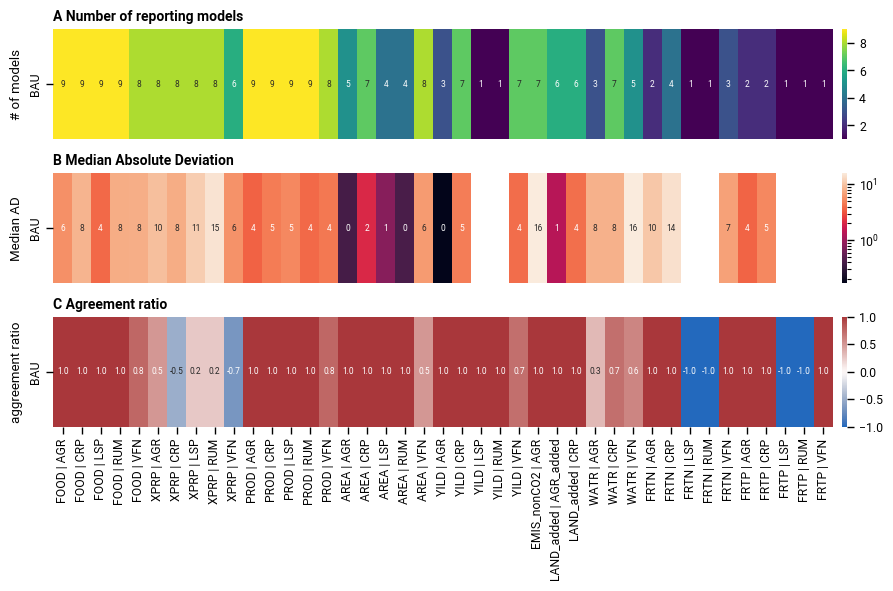

In [13]:
variables = ['FOOD','XPRP','PROD','AREA','YILD','EMIS_nonCO2','LAND_added','WATR','FRTN','FRTP']
scenarios = ['BAU']
regions = ['WLD']
items = ['AGR','AGR_added','CRP','LSP','VFN','RUM']
year = 2050
value = 'percent_change_BAU_ref_year'
cols =  ['model','scenario','region','variable','item',value]
fdf = df[(df.scenario.isin(scenarios)) &
        (df.region.isin(regions))&
        (df.variable.isin(variables)) &
        (df.item.isin(items)) &
        (df.year==year)][cols]
fdf['scenario'] = pd.Categorical(
    fdf['scenario'], categories=scenarios, ordered=True)
fdf['variable'] = pd.Categorical(
    fdf['variable'], categories=variables, ordered=True)
ffdf = fdf.pivot_table(index=['model','scenario'],columns=['variable','item'],values=value)
ffdf.columns = ffdf.columns.to_series().str.join(' | ')
ffdf.dropna(axis=1, how='all',inplace=True)


sns.set_context("paper")
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
sns.heatmap(ffdf.groupby(['scenario']).nunique(),cmap='viridis',xticklabels=False,annot=True,fmt='.0f',annot_kws={'size': 6}, cbar_kws={"pad": 0.01})
plt.title("A Number of reporting models",fontsize = 10,fontweight = 'bold', loc='left')
plt.ylabel("# of models")

plt.subplot(3,1,2)
mad_by_scenario = ffdf.groupby(['scenario']).apply(median_absolute_deviation)
sns.heatmap(mad_by_scenario, norm=LogNorm(),xticklabels=False,annot=True,fmt='.0f',annot_kws={'size': 6}, cbar_kws={"pad": 0.01})
plt.title("B Median Absolute Deviation",fontsize = 10,fontweight = 'bold', loc='left')
plt.ylabel("Median AD")


plt.subplot(3,1,3)
result = ffdf.groupby(['scenario']).apply(pos_neg_ratio)
sns.heatmap(result,center=0, cmap='vlag',  xticklabels=True,annot=True,fmt='.1f',annot_kws={'size': 6}, cbar_kws={"pad": 0.01})
plt.title("C Agreement ratio",fontsize = 10,fontweight = 'bold', loc='left')
plt.ylabel("aggreement ratio")
plt.tight_layout()

plt.savefig(pjoin(si_dir,'coverage-map-BAU.png'),transparent=True,bbox_inches='tight', dpi=300)


/var/folders/fb/n4xwnb3j3k5cvst1c8l15xk00000gn/T/ipykernel_91894/1392900857.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ffdf = fdf.pivot_table(index=['model','scenario'],columns=['variable','item'],values='percent_change_BAU')
/var/folders/fb/n4xwnb3j3k5cvst1c8l15xk00000gn/T/ipykernel_91894/1392900857.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(ffdf.groupby(['scenario']).nunique(),cmap='viridis',xticklabels=False,annot=True,fmt='.0f',annot_kws={'size': 6}, cbar_kws={"pad": 0.01})
/var/folders/fb/n4xwnb3j3k5cvst1c8l15xk00000gn/T/ipykernel_91894/1392900857.py:30: FutureWarning: The default of observed=False i

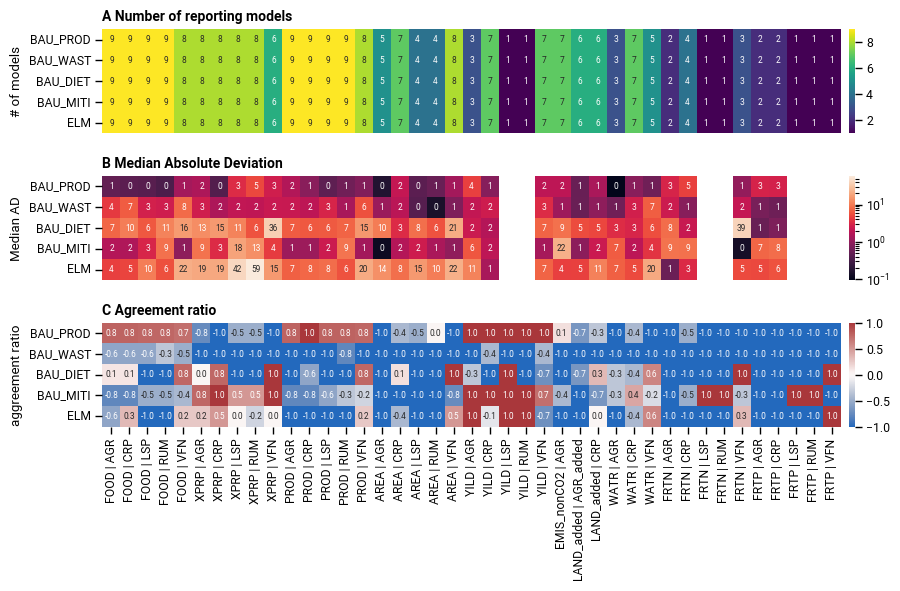

In [14]:
variables = ['FOOD','XPRP','PROD','AREA','YILD','EMIS_nonCO2','LAND_added','WATR','FRTN','FRTP']
scenarios = ['BAU_PROD','BAU_WAST','BAU_DIET','BAU_MITI','ELM']
regions = ['WLD']
items = ['AGR','AGR_added','CRP','LSP','VFN','RUM']
year = 2050
value = 'percent_change_BAU'
cols =  ['model','scenario','region','variable','item',value]
fdf = df[(df.scenario.isin(scenarios)) &
        (df.region.isin(regions))&
        (df.variable.isin(variables)) &
        (df.item.isin(items)) &
        (df.year==year)][cols]
fdf['scenario'] = pd.Categorical(
    fdf['scenario'], categories=scenarios, ordered=True)
fdf['variable'] = pd.Categorical(
    fdf['variable'], categories=variables, ordered=True)
ffdf = fdf.pivot_table(index=['model','scenario'],columns=['variable','item'],values='percent_change_BAU')
ffdf.columns = ffdf.columns.to_series().str.join(' | ')
ffdf.dropna(axis=1, how='all',inplace=True)


sns.set_context("paper")
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
sns.heatmap(ffdf.groupby(['scenario']).nunique(),cmap='viridis',xticklabels=False,annot=True,fmt='.0f',annot_kws={'size': 6}, cbar_kws={"pad": 0.01})
plt.title("A Number of reporting models",fontsize = 10,fontweight = 'bold', loc='left')
plt.ylabel("# of models")

plt.subplot(3,1,2)
mad_by_scenario = ffdf.groupby(['scenario']).apply(median_absolute_deviation)
sns.heatmap(mad_by_scenario, norm=LogNorm(),xticklabels=False,annot=True,fmt='.0f',annot_kws={'size': 6}, cbar_kws={"pad": 0.01})
plt.title("B Median Absolute Deviation",fontsize = 10,fontweight = 'bold', loc='left')
plt.ylabel("Median AD")


plt.subplot(3,1,3)
result = ffdf.groupby(['scenario']).apply(pos_neg_ratio)
sns.heatmap(result,center=0, cmap='vlag',  xticklabels=True,annot=True,fmt='.1f',annot_kws={'size': 6}, cbar_kws={"pad": 0.01})
plt.title("C Agreement ratio",fontsize = 10,fontweight = 'bold', loc='left')
plt.ylabel("aggreement ratio")
plt.tight_layout()
plt.savefig(pjoin(si_dir,'coverage-map-scenarios.png'),transparent=True,bbox_inches='tight', dpi=300)

### Figures S10 and S11: GDP pc vs FEXP

***Figure S 10 Global food expenditure vs GDP per capita by scenario.***

A shows percent changes in global GDP per capita versus food expenditure in 2050 compared to 2020. B compares global GDP per capita versus food expenditure across counterfactual scenarios relative to BAU 2050. Colors indicate scenarios, while symbols represent the three models (AIM, ENVISAGE, and MAGNET) that report endogenous GDP changes and food expenditure. The horizontal dashed grey line marks zero change in GDP per capita (note: beyond the axes in A), while the vertical dashed grey line marks zero change in food expenditure. The solid diagonal line represents equal percentage changes in both metrics. Points below this diagonal (lower right of the plot) indicate scenarios where food expenditure increases proportionally more than GDP per capita, suggesting decreased food affordability relative to the reference point (2020 for A, BAU 2050 for B; note: diagonal line beyond the axes in A).

***Figure S 11 Regional food expenditure vs GDP per capita.***

A shows percent changes in regional GDP per capita versus food expenditure in 2050 compared to 2020. B compares regional GDP per capita versus food expenditure across counterfactual scenarios relative to BAU 2050. Colors indicate scenarios, while symbols represent the different regions. The horizontal dashed grey line marks zero change in GDP per capita (note: beyond the axes in A), while the vertical dashed grey line marks zero change in food expenditure. The solid diagonal line represents equal percentage changes in both metrics. Points below this diagonal (lower right of the plot) indicate scenarios where food expenditure increases proportionally more than GDP per capita, suggesting decreased food affordability relative to the reference point (2020 for A, BAU 2050 for B).


In [15]:
years = [2050,2020]
region = 'WLD'
value = 'value'
cols = ['model', 'scenario', 'region', 'variable', 'item', 'unit', 'year',
       value]
models = ['AIM','ENVISAGE','MAGNET']
# Use all scenarios instead of the subset
scenarios = ['BAU','BAU_PROD','BAU_WAST','BAU_DIET','ELM','BAU_MITI']
regions = ['WLD','CAN','USA','BRA','OSA','FSU','EUR','MEN','SSA','CHN','IND','SEA','OAS','ANZ']
gdp_pc = df[(df.region.isin(regions)) &
            (df.year.isin(years)) &
            (df.item == 'TOT') &
            (df.model.isin(models)) &
            (df.scenario.isin(scenarios)) &
            (df.variable.isin(['GDPT','POPT']))][cols]

gdp_pc = gdp_pc.pivot(index= ['model','region'],columns=['variable','year','scenario'],values=value).reset_index()

# get GDP per capita for all scenarios
gdpt_conversion = 1_000_000_000
popt_conversion = 1_000_000

# Calculate GDP per capita for 2050 for all scenarios
for scenario in scenarios:
    gdp_pc[f'{scenario}_2050'] = gdp_pc[('GDPT', 2050, scenario)] / gdp_pc[('POPT', 2050, scenario)] * (gdpt_conversion/popt_conversion)

# Calculate GDP per capita for 2020 (using BAU as reference)
gdp_pc['BAU_2020'] = gdp_pc[('GDPT', 2020, 'BAU')] / gdp_pc[('POPT', 2020, 'BAU')] * (gdpt_conversion/popt_conversion)

# Calculate % change vs BAU 2050 for all scenarios
for scenario in scenarios:
    gdp_pc[f'{scenario}_percent_change_BAU'] = basic.percent_change(gdp_pc['BAU_2050'], gdp_pc[f'{scenario}_2050'])

# Calculate % change vs BAU 2020 for all scenarios
for scenario in scenarios:
    gdp_pc[f'{scenario}_percent_change_BAU_ref_year'] = basic.percent_change(gdp_pc['BAU_2020'], gdp_pc[f'{scenario}_2050'])

# Build dynamic column list
cols = ['model', 'region']
# Add 2050 columns for all scenarios
for scenario in scenarios:
    cols.append(f'{scenario}_2050')
# Add BAU_2020
cols.append('BAU_2020')
# Add percent change vs BAU 2050 columns
for scenario in scenarios:
    cols.append(f'{scenario}_percent_change_BAU')
# Add percent change vs BAU 2020 columns
for scenario in scenarios:
    cols.append(f'{scenario}_percent_change_BAU_ref_year')

gdp_pc = gdp_pc[cols]
gdp_pc.columns = gdp_pc.columns.get_level_values(0)

# Reconstruct to fit master dataframe structure
# 1. Absolute values
scenario_year_cols = [f'{scenario}_2050' for scenario in scenarios] + ['BAU_2020']
gdp_pc_abs = gdp_pc.melt(id_vars=['model', 'region'], 
                         value_vars=scenario_year_cols,
                         var_name='scenario', 
                         value_name='value')
gdp_pc_abs['year'] = [int(x.split('_')[-1]) for x in gdp_pc_abs['scenario']]
# For gdp_pc_abs, we need to preserve the full scenario name
# Extract scenario name by removing the year part (e.g., "_2050" or "_2020")
gdp_pc_abs['scenario'] = [x.rsplit('_', 1)[0] for x in gdp_pc_abs['scenario']]

# 2. Percent change vs BAU 2050
percent_change_bau_cols = [f'{scenario}_percent_change_BAU' for scenario in scenarios]
gdp_pc_change = gdp_pc.melt(id_vars=['model', 'region'], 
                           value_vars=percent_change_bau_cols,
                           var_name='scenario', 
                           value_name='percent_change_BAU')
gdp_pc_change['year'] = 2050
# Extract the full scenario name by removing the "_percent_change_BAU" suffix
gdp_pc_change['scenario'] = [x.replace('_percent_change_BAU', '') for x in gdp_pc_change['scenario']]

# 3. Percent change vs BAU 2020
percent_change_ref_cols = [f'{scenario}_percent_change_BAU_ref_year' for scenario in scenarios]
gdp_pc_change_ref_year = gdp_pc.melt(id_vars=['model', 'region'], 
                                    value_vars=percent_change_ref_cols,
                                    var_name='scenario', 
                                    value_name='percent_change_BAU_ref_year')
gdp_pc_change_ref_year['year'] = 2050
# Extract the full scenario name by removing the "_percent_change_BAU_ref_year" suffix
gdp_pc_change_ref_year['scenario'] = [x.replace('_percent_change_BAU_ref_year', '') for x in gdp_pc_change_ref_year['scenario']]

# Merge all dataframes
gdp_pc = gdp_pc_abs.merge(gdp_pc_change, on=['model', 'region', 'scenario', 'year'])\
                  .merge(gdp_pc_change_ref_year, on=['model', 'region', 'scenario', 'year'])
gdp_pc['variable'] = 'GDP_pc'
gdp_pc['unit'] = 'USD/capita'

In [16]:
models = ['AIM','ENVISAGE','MAGNET']
scenarios = ['BAU','BAU_PROD','BAU_WAST','BAU_DIET','ELM','BAU_MITI']
regions = ['WLD','CAN','USA','BRA','OSA','FSU','EUR','MEN','SSA','CHN','IND','SEA','OAS','ANZ']
# regions = ['WLD','NAM','OAM','AME','SAS']
cols = ['model', 'scenario', 'region', 'variable', 'unit', 'year','percent_change_BAU','value','percent_change_BAU_ref_year']
years = [2050]
fexp = df[(df.region.isin(regions)) &
            (df.year.isin(years)) &
            (df.item == 'TOT') &
            (df.model.isin(models)) &
            (df.scenario.isin(scenarios)) &
            (df.variable.isin(['FEXP']))][cols]

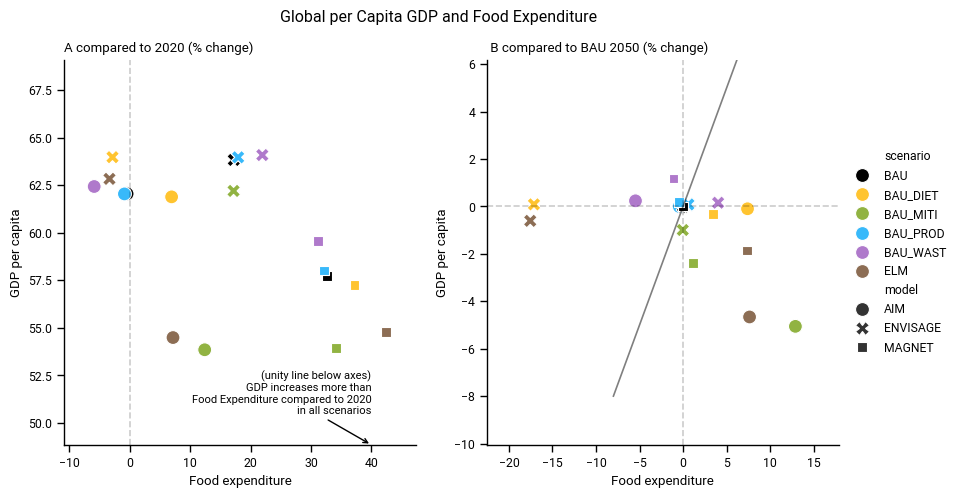

In [17]:
fdf = pd.concat([gdp_pc,fexp])
fdf = fdf[fdf.region=='WLD']
scenario_style = {'BAU': '#757575',
                  'EL2': '#FF8622',
                  'ELM':'#556827',
                  'BAU_DIET' : '#FFC430',
                  'BAU_PROD': '#0579B3',
                  'BAU_WAST': '#38BBDC',
                  'BAU_MITI': '#85A43D'}

scenario_style = {'BAU': 'k',
                    'BAU_DIET': '#ffc430',
                    'BAU_PROD': '#38b9fa',
                    'BAU_WAST': '#af79cb',
                    'BAU_MITI': '#91b342',
                    'ELM': '#8C6D54'
}
style = 'model'
hue = 'scenario'

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
x_pad = 5
y_pad = 5
value= 'percent_change_BAU_ref_year'
cols = ['model', 'scenario', 'region', 'variable', 'unit', 'year',value]
plot_df = fdf[cols].pivot(index= ['model','scenario','region'],columns='variable',values=value).reset_index()

sns.scatterplot(data=plot_df,x='FEXP',y='GDP_pc',hue=hue,style=style,s=100,palette=scenario_style,legend=False)
plt.plot([-8,200],[-8,200],'k-',alpha=0.5)
plt.plot([plot_df['FEXP'].min()-x_pad,plot_df['FEXP'].max()+x_pad],[0,0],'k--',alpha=0.2)
plt.plot([0,0],[plot_df['GDP_pc'].min()-y_pad,plot_df['GDP_pc'].max()+y_pad],'k--',alpha=0.2)

plt.ylim([plot_df['GDP_pc'].min()-y_pad,plot_df['GDP_pc'].max()+y_pad])
plt.xlim([plot_df['FEXP'].min()-x_pad,plot_df['FEXP'].max()+x_pad])
sns.despine()
plt.ylabel("GDP per capita")
plt.xlabel("Food expenditure")
plt.title("A compared to 2020 (% change)", loc= 'left')


# Find the minimum GDP_pc value and set the annotation just below the y-axis minimum
y_annot = plot_df['GDP_pc'].min()-y_pad
x_annot = 40  # at zero FEXP

plt.annotate(
    "(unity line below axes)\nGDP increases more than\nFood Expenditure compared to 2020\nin all scenarios",
    xy=(x_annot, y_annot), xycoords='data',
    xytext=(x_annot, y_annot+1.5), textcoords='data',
    arrowprops=dict(arrowstyle="->", color='black', lw=1),
    bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.8),
    ha='right',        
    va='bottom',
    fontsize=8
)

plt.subplot(1,2,2)
x_pad = 5
y_pad = 5
value= 'percent_change_BAU'
cols = ['model', 'scenario', 'region', 'variable', 'unit', 'year',value]
plot_df = fdf[cols].pivot(index= ['model','scenario','region'],columns='variable',values=value).reset_index()
# plot_df = plot_df[plot_df.scenario!='BAU']
sns.scatterplot(data=plot_df,x='FEXP',y='GDP_pc',hue=hue,style=style,s=100,palette=scenario_style)
plt.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([-8,200],[-8,200],'k-',alpha=0.5)
plt.plot([plot_df['FEXP'].min()-x_pad,plot_df['FEXP'].max()+x_pad],[0,0],'k--',alpha=0.2)
plt.plot([0,0],[plot_df['GDP_pc'].min()-y_pad,plot_df['GDP_pc'].max()+y_pad],'k--',alpha=0.2)

plt.ylim([plot_df['GDP_pc'].min()-y_pad,plot_df['GDP_pc'].max()+y_pad])
plt.xlim([plot_df['FEXP'].min()-x_pad,plot_df['FEXP'].max()+x_pad])
sns.despine()
plt.title(" B compared to BAU 2050 (% change)", loc='left')
# plt.title("GDP per capita vs Food Expenditure, percent change from BAU 2020")
plt.ylabel("GDP per capita")
plt.xlabel("Food expenditure")

plt.suptitle("Global per Capita GDP and Food Expenditure")
plt.savefig(pjoin(si_dir,'global-gdppc_fexp.png'),bbox_inches='tight',dpi=300)


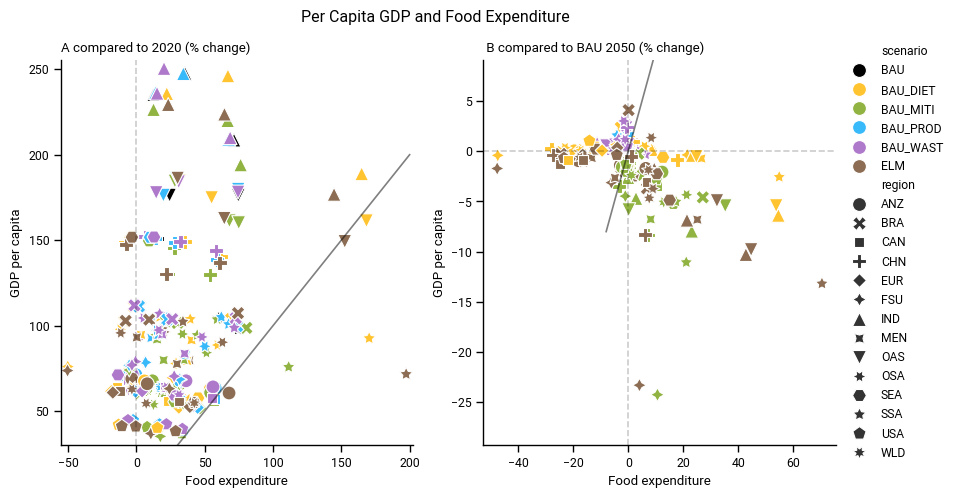

In [18]:
fdf = pd.concat([gdp_pc,fexp])
# fdf = fdf[fdf.region=='WLD']
scenario_style = {'BAU': '#757575',
                  'EL2': '#FF8622',
                  'ELM':'#556827',
                  'BAU_DIET' : '#FFC430',
                  'BAU_PROD': '#0579B3',
                  'BAU_WAST': '#38BBDC',
                  'BAU_MITI': '#85A43D'}

scenario_style = {'BAU': 'k',
                    'BAU_DIET': '#ffc430',
                    'BAU_PROD': '#38b9fa',
                    'BAU_WAST': '#af79cb',
                    'BAU_MITI': '#91b342',
                    'ELM': '#8C6D54'
}
style = 'region'
hue = 'scenario'

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
x_pad = 5
y_pad = 5
value= 'percent_change_BAU_ref_year'
cols = ['model', 'scenario', 'region', 'variable', 'unit', 'year',value]
plot_df = fdf[cols].pivot(index= ['model','scenario','region'],columns='variable',values=value).reset_index()

sns.scatterplot(data=plot_df,x='FEXP',y='GDP_pc',hue=hue,style=style,s=100,palette=scenario_style,legend=False)
plt.plot([-8,200],[-8,200],'k-',alpha=0.5)
plt.plot([plot_df['FEXP'].min()-x_pad,plot_df['FEXP'].max()+x_pad],[0,0],'k--',alpha=0.2)
plt.plot([0,0],[plot_df['GDP_pc'].min()-y_pad,plot_df['GDP_pc'].max()+y_pad],'k--',alpha=0.2)

plt.ylim([plot_df['GDP_pc'].min()-y_pad,plot_df['GDP_pc'].max()+y_pad])
plt.xlim([plot_df['FEXP'].min()-x_pad,plot_df['FEXP'].max()+x_pad])
sns.despine()
plt.title("A compared to 2020 (% change)", loc= 'left')
plt.ylabel("GDP per capita")
plt.xlabel("Food expenditure")
plt.subplot(1,2,2)
x_pad = 5
y_pad = 5
value= 'percent_change_BAU'
cols = ['model', 'scenario', 'region', 'variable', 'unit', 'year',value]
plot_df = fdf[cols].pivot(index= ['model','scenario','region'],columns='variable',values=value).reset_index()
# plot_df = plot_df[plot_df.scenario!='BAU']
sns.scatterplot(data=plot_df,x='FEXP',y='GDP_pc',hue=hue,style=style,s=100,palette=scenario_style)
plt.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([-8,200],[-8,200],'k-',alpha=0.5)
plt.plot([plot_df['FEXP'].min()-x_pad,plot_df['FEXP'].max()+x_pad],[0,0],'k--',alpha=0.2)
plt.plot([0,0],[plot_df['GDP_pc'].min()-y_pad,plot_df['GDP_pc'].max()+y_pad],'k--',alpha=0.2)

plt.ylim([plot_df['GDP_pc'].min()-y_pad,plot_df['GDP_pc'].max()+y_pad])
plt.xlim([plot_df['FEXP'].min()-x_pad,plot_df['FEXP'].max()+x_pad])
sns.despine()
plt.title(" B compared to BAU 2050 (% change)", loc='left')
# plt.title("GDP per capita vs Food Expenditure, percent change from BAU 2020")
plt.ylabel("GDP per capita")
plt.xlabel("Food expenditure")
plt.suptitle("Per Capita GDP and Food Expenditure")
plt.savefig(pjoin(si_dir,'gdppc-fexp.pdf'),bbox_inches='tight',dpi=300)


### Figure S12 Ratio of calorie intake and availability by model
Shows the ratio of calorie intake and calorie availability by model and by scenario (black = Business as usual, yellow = diet shift, green = mitigation, blue = increased productivity, violet = reduced food loss and waste, and brown = ELM), . A ratio of 1 means that all the available calories are consumed. In majority of the models, scenarios that include the reduction of food loss and waste show an increased ratio indicating that of what is available is consumed.


In [19]:
df_calo = df[df['variable'] == 'CALO'].copy()
df_cali = df[(df['variable'] == 'CALI') ].copy()


df_merged = pd.merge(df_calo, df_cali, 
                     on=['model', 'scenario', 'region', 'item','unit','year'],
                     how='left')

df_merged['ratio'] =((df_merged['value_y']) / (df_merged['value_x']))



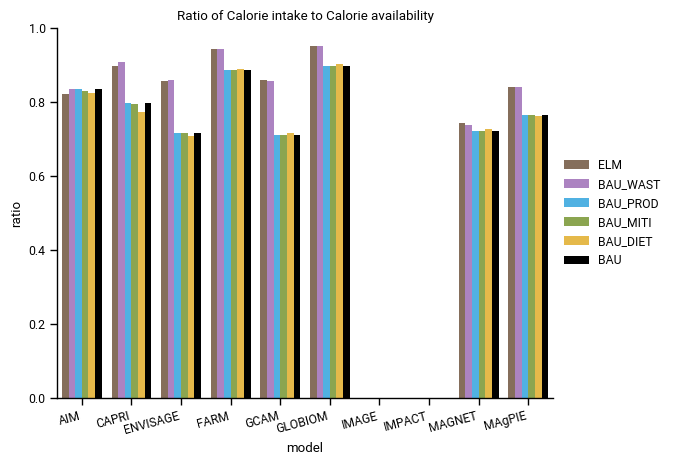

In [20]:
# scenario_style = {'BAU': '#757575',
#                   'EL2': '#F06A00',
#                   'ELM':'#556827',
#                   'BAU_DIET' : '#FFC430',
#                   'BAU_PROD': '#38B9FA',
#                   'BAU_WAST': '#AF79CB',
#                   'BAU_MITI': '#91B342'}
scenario_style = {'BAU': 'k',
                    'BAU_DIET': '#ffc430',
                    'BAU_PROD': '#38b9fa',
                    'BAU_WAST': '#af79cb',
                    'BAU_MITI': '#91b342',
                    'ELM': '#8C6D54'
}
scenarios = ['BAU','BAU_PROD','BAU_WAST','BAU_DIET','BAU_MITI','ELM']
sns.barplot(data=df_merged[(df_merged.region=='WLD') 
                           & (df_merged.scenario.isin(scenarios))
                           & (df_merged.item=='AGR') 
                           & (df_merged.year==2050)].sort_values(by='model'),
                           x='model',
                           y='ratio',
                           hue='scenario',
                           palette=scenario_style)
plt.xticks(rotation=15,ha='right')
plt.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Ratio of Calorie intake to Calorie availability")
sns.despine()
plt.savefig(pjoin(si_dir,'calo-cali.png'),bbox_inches='tight',dpi=300)

## Extended Results : Summaries

### Figures S2 to S9: summaries for food demand, producer price and production for key agriculture commodities

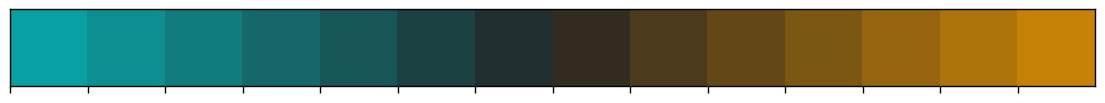

In [21]:
max_yield_change = 25
# create color map
n_colors = 14
cmap = sns.diverging_palette(196, 47, s=99,l=60,n=n_colors,sep=1,center="dark")
sns.palplot(cmap)
colorspace =np.linspace(-max_yield_change,max_yield_change,n_colors)
def get_color(value):
    return (np.abs(colorspace - value)).argmin()

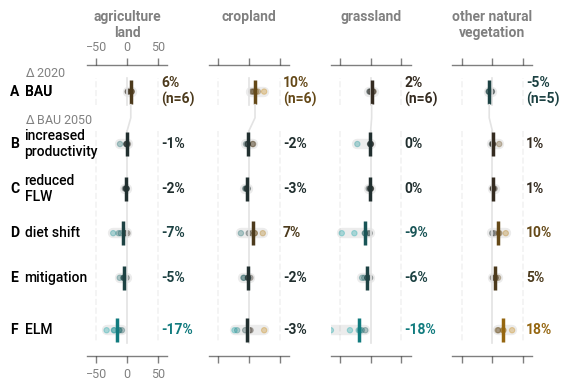

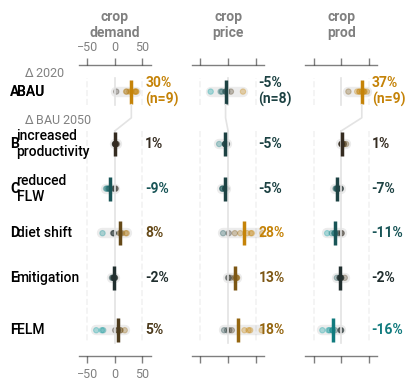

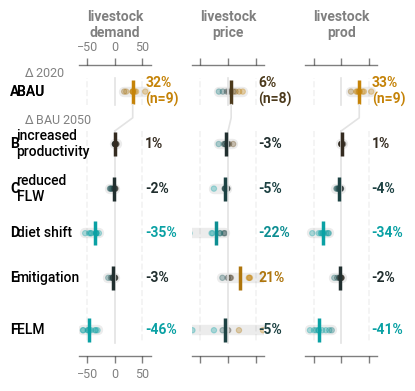

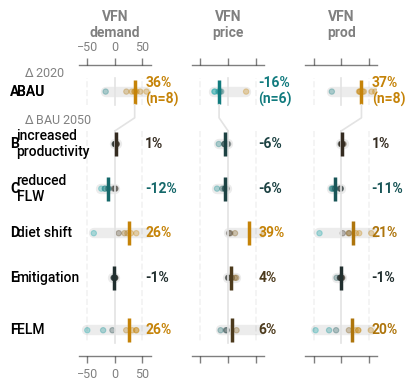

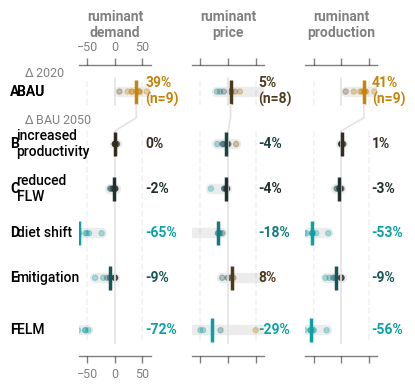

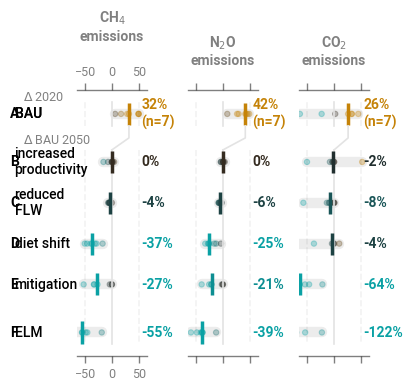

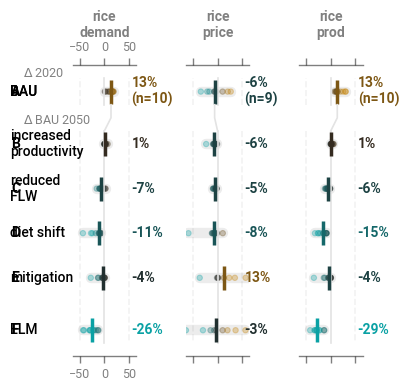

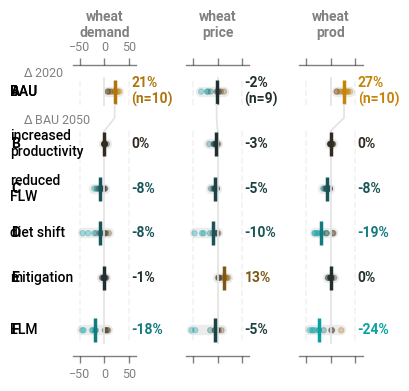

In [22]:
afont = {'fontsize' : 10, 'weight':'medium'} # scenario titles
bfont = {'fontsize' : 10, 'weight':'bold'} # medians
cfont = {'fontsize' : 9, 'weight':'regular'} #change labels
xfont = {'fontsize' : 9, 'weight':'regular'} #x labels

pfont = {'fontsize' : 10,'weight':'bold'} # title
hfont = {'fontsize' : 10,'color':'grey','weight':'bold'} # title

variable_sets = [
                    {'agriculture\nland': {'variable': 'LAND_added',
                                  'item': 'AGR_added'},
                  'cropland'  : {'variable':'LAND_added',
                                        'item':'CRP'},
                  'grassland'       : {'variable':'LAND_added',
                                        'item':'GRS'},
                  'other natural\nvegetation': {'variable':'LAND_added',
                                        'item':'ONV_added'},
                    },
                 {'crop\ndemand': {'variable': 'FOOD',
                                           'item': 'CRP'},
                  'crop\nprice'  : {'variable':'XPRP',
                                        'item':'CRP'},
                  'crop\nprod'  : {'variable':'PROD',
                                        'item':'CRP'},
                    },
                 {'livestock\ndemand': {'variable': 'FOOD',
                                           'item': 'LSP'},
                  'livestock\nprice'  : {'variable':'XPRP',
                                        'item':'LSP'},
                  'livestock\nprod'  : {'variable':'PROD',
                                        'item':'LSP'},
                    },
                {'VFN\ndemand': {'variable': 'FOOD',
                                           'item': 'VFN'},
                  'VFN\nprice'  : {'variable':'XPRP',
                                        'item':'VFN'},
                  'VFN\nprod'  : {'variable':'PROD',
                                        'item':'VFN'},
                    },
                    {'ruminant\ndemand' : {'variable':'FOOD',
                                        'item':'RUM'},
                  'ruminant\nprice': {'variable':'XPRP',
                                        'item':'RUM'},
                    'ruminant\nproduction': {'variable':'PROD',
                                        'item':'RUM'}},
                {'CH$_4$\nemissions' : {'variable':'ECH4',
                                        'item':'AGR'},
                'N$_2$O\nemissions' : {'variable':'EN2O',
                                        'item':'AGR'},
                'CO$_2$\nemissions' : {'variable':'ECO2',
                                        'item':'TOT'}},
                {'rice\ndemand': {'variable': 'FOOD',
                                           'item': 'RIC'},
                  'rice\nprice'  : {'variable':'XPRP',
                                        'item':'RIC'},
                  'rice\nprod'  : {'variable':'PROD',
                                        'item':'RIC'}},
                   {'wheat\ndemand': {'variable': 'FOOD',
                                           'item': 'WHT'},
                  'wheat\nprice'  : {'variable':'XPRP',
                                        'item':'WHT'},
                  'wheat\nprod'  : {'variable':'PROD',
                                        'item':'WHT'}},                     
                    ]

year = 2050
region = 'WLD'
scenarios = ['BAU','BAU_PROD','BAU_WAST','BAU_DIET','BAU_MITI','ELM']
scenario_value = 'percent_change_BAU'
bau_value = 'percent_change_BAU_ref_year'
fdf = df[(df.region==region) & (df.year==year)]


box_width = 0.2
y_pad = 0.25
x_axis_alpha = 0.5
y_axis_pad = 0.5
y_spacing = 0.85
y_spacing_m = 1

ys = np.hstack([[0],np.cumsum(np.hstack([[y_spacing_m],[y_spacing for x in range(3)],[y_spacing_m]]))]) #np.hstack([[0], np.arange(1,len(scenarios)*y_spacing+y_spacing,y_spacing)])
y_max = np.max(ys)
zero_line_color = '#e3e3e3'
scenario_style = {'BAU': '#757575',
                  'EL2': '#FF8622',
                  'ELM':'#A6CE4A',
                  'BAU_DIET' : '#FFC430',
                  'BAU_PROD': '#0579B3',
                  'BAU_WAST': '#38BBDC',
                  'BAU_MITI': '#85A43D'}

scenario_text = {'BAU':'BAU', 
                   'EL2': 'EL2',
                   'ELM': 'ELM',
                   'BAU_DIET':'diet shift',
                   'BAU_PROD':'increased\nproductivity',
                   'BAU_WAST':'reduced\nFLW',
                   'BAU_MITI':'mitigation'}

scenario_labels = [''] + [scenario_text[s] for s in scenarios]
pos_color = 'red'
neg_color = 'steelblue'
shade_color = 'grey'
median_pad = 0.03
rows = 1
fig_width = 7.25
subplot_width = 7.25/5
fig_height = 4


for v, variables in enumerate(variable_sets):
    
    # variable_labels = [variable_dict[x] for x in variables]
    scenario_num = 0
    cols = len(variables)
    # subplot_width = fig_width/cols
    fig = plt.figure(figsize=(subplot_width*cols,fig_height))


    for col, variable_name in enumerate(variables):
        variable = variables[variable_name]['variable']
        item = variables[variable_name]['item']

        ax = plt.subplot(rows,cols,col+1)
        # guide line for BAU 
        plt.plot([0,0],[y_pad,0-y_pad],color=zero_line_color,alpha=1)
        plt.plot([50,50],[y_pad,0-y_pad],'k--',alpha=0.05)
        plt.plot([-50,-50],[y_pad,0-y_pad],'k--',alpha=0.05)

        # guide line for other scenarios 
        plt.plot([0,0],[1-y_pad,y_max+y_pad],color=zero_line_color,alpha=1)
        plt.plot([50,50],[1-y_pad,y_max+y_pad],'k--',alpha=0.05)
        plt.plot([-50,-50],[1-y_pad,y_max+y_pad],'k--',alpha=0.05)

        num_model  = 0

        for y, scenario in zip(ys,scenarios):#enumerate(scenarios):
            plot_data = []
            if scenario=='BAU':
                value = bau_value
            else:
                value = scenario_value

            for i, model in enumerate(df.model.unique()):
                unit = fdf[fdf.variable==variable].unit.unique()

                val = fdf[(fdf.variable==variable) &
                        (fdf.model==model) &
                        (fdf.item==item) &
                        (fdf.scenario==scenario) &
                        (fdf.unit.isin(unit))][value].values
                if len(val)>0:# == 1:
                    plot_data.append(val[0])
            
            color = [cmap[get_color(x)] for x in plot_data]#[pos_color if x>0 else neg_color for x in plot_data]
            median_color = cmap[get_color(np.nanmedian(plot_data))]

            # plt.vlines(plot_data,y-box_width,y+box_width,color = color)
            plt.scatter(plot_data,np.ones_like(plot_data)*y,color=color,alpha=0.3,s=15)
            plt.plot([np.nanmin(plot_data),np.nanmax(plot_data)],[y,y],zorder=0,color=shade_color,alpha=0.15,linewidth=7.5,solid_capstyle='round')
            plt.vlines(np.nanmedian(plot_data),y-box_width-median_pad,y+box_width+median_pad,color = median_color,**{'linewidth':2.5})

            # annotate with %change, if its nan, drop it
            try:
                color = cmap[get_color(np.nanmedian(plot_data))]
                if scenario=='BAU':
                    annotate_text = f"{int(np.rint(np.nanmedian(plot_data)))}%\n(n={np.sum(~np.isnan(plot_data))})"
                else:
                    annotate_text = f"{int(np.rint(np.nanmedian(plot_data)))}%"
                    
                plt.annotate(annotate_text,(55,y),color=color,va='center',**bfont)
            except Exception as e:
                print(item,variable,e)

            ## annotate with a panel letter
            if col==0:
                px = -190#186.61290322580646 # this is from running it once, getting the y-label position in data coordinates (to adjust the y-label position based on all the labels, not just the first one)
                annotate_text = f'{string.ascii_uppercase[scenario_num]}'
                ax.text(px,y,annotate_text,ha='left',va='center', **pfont)
                scenario_num+=1

            if scenario=='BAU':
                # draw line from BAU to other scenarios
                plt.plot([np.nanmedian(plot_data),np.nanmedian(plot_data),0],[y_pad,0.5,1-y_pad],color=zero_line_color)
            
            num_model = np.max(np.hstack([[num_model],len(plot_data)]))
                
        ax.set_ylim(y_max+y_axis_pad,0-y_axis_pad)
        ax.set_xlim(-65,65)

        # ylbl = ax.set_ylabel('')
        # px,py = ax.transData.inverted().transform(ylbl.get_position())
        # print(px)

        # formatting the first column with annotations, and clean up the rest
        if col>0:
            sns.despine(left=True,top=False,ax=ax)
            ax.set_yticks(list(ys))
            ax.set_yticklabels([])
            ax.tick_params(axis='y',length=0)
            ax.set_xticklabels([])
            # ax.tick_params(axis='x',length=0)
            # plt.setp(ax.get_xticklabels(), alpha=x_axis_alpha)
            ax.spines['bottom'].set_alpha(x_axis_alpha)
            ax.spines['top'].set_alpha(x_axis_alpha)
            ax.tick_params(axis='x',colors=[0,0,0,x_axis_alpha],bottom=True,top=True,labelbottom=True, labeltop=True)


        else:
            cx = -165#-186.61290322580646 ## this is from running it once, getting the y-label position in data coordinates (to adjust the y-label position based on all the labels, not just the first one)
            # annotation for BAU (change from current state)
            annotate_text = f"$\Delta$ 2020"
            # plt.annotate(annotate_text,(px,-0.35),color='grey',va='center',ha='left',**cfont)
            ax.text(cx,-0.35,annotate_text,ha='left',va='center',color='grey', **cfont)
            # annotation for scenarios (change from BAU)
            annotate_text = f"$\Delta$ BAU 2050"
            # plt.annotate(annotate_text,(px,ys[1]-0.35),color='grey',va='bottom',ha='left', **cfont) 
            ax.text(cx,ys[1]-0.45,annotate_text,ha='left',va='center',color='grey', **cfont)

            #scenario labels  
            ax.tick_params(axis='y',length=0)
            ax.set_yticks([0] + list(ys))
            ax.set_yticklabels(scenario_labels, va='center',ha='left', **afont)
            ax.tick_params(axis='y', pad=45)


            # x tick labels
            ax.spines['bottom'].set_alpha(x_axis_alpha)
            ax.spines['top'].set_alpha(x_axis_alpha)
            ax.tick_params(axis='x',colors=[0,0,0,x_axis_alpha],bottom=True,top=True,labelbottom=True, labeltop=True)
            plt.setp(ax.get_xticklabels(), alpha=x_axis_alpha,**xfont)

            sns.despine(left=True,top=False)

        # ax.text(0,-1.6,f'{variable_name}',va='top',ha='center', **hfont)  
        ax.set_title(f'{variable_name}',pad=40,horizontalalignment='center', verticalalignment='top',**hfont)
        # ax.set_title(f'{string.ascii_uppercase[col]}.',pad=40,loc='left', horizontalalignment='right', verticalalignment='top',**pfont)


    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()
    save_name = f'{base_filename}_summary-fig_{region}-{"_".join([variables[v]["variable"]+"-"+variables[v]["item"] for v in variables])}-{time.strftime("%Y%m%d", time.localtime())}.png'
    plt.savefig(pjoin(si_dir,save_name),transparent=True,bbox_inches='tight', dpi=300)

### Figure S16 Animal Numbers and Livestock Yield

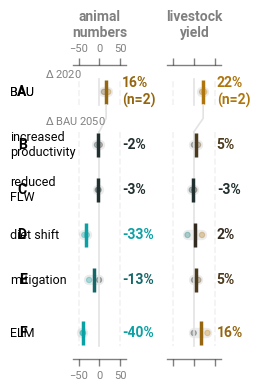

In [23]:
afont = {'fontsize' : 9, 'weight':'regular'} # scenario titles
bfont = {'fontsize' : 10, 'weight':'bold'} # medians
cfont = {'fontsize' : 8, 'weight':'regular'} #change labels
xfont = {'fontsize' : 8, 'weight':'regular'} #x labels

pfont = {'fontsize' : 10,'weight':'bold'} # title
hfont = {'fontsize' : 10,'color':'grey','weight':'bold'} # title

variable_sets = [
                    {'animal\nnumbers': {'variable': 'ANNR_prod',
                                  'item':[ 'TOT','LSP']},
                  'livestock\nyield'  : {'variable':'LYLD',
                                        'item':['LSP']}}
                    ]

year = 2050
region = 'WLD'
scenarios = ['BAU','BAU_PROD','BAU_WAST','BAU_DIET','BAU_MITI','ELM']
scenario_value = 'percent_change_BAU'
bau_value = 'percent_change_BAU_ref_year'
fdf = df[(df.region==region) & (df.year==year)]


box_width = 0.2
y_pad = 0.25
x_axis_alpha = 0.5
y_axis_pad = 0.5
y_spacing = 0.85
y_spacing_m = 1

ys = np.hstack([[0],np.cumsum(np.hstack([[y_spacing_m],[y_spacing for x in range(3)],[y_spacing_m]]))]) #np.hstack([[0], np.arange(1,len(scenarios)*y_spacing+y_spacing,y_spacing)])
y_max = np.max(ys)
zero_line_color = '#e3e3e3'
scenario_style = {'BAU': '#757575',
                  'EL2': '#FF8622',
                  'ELM':'#A6CE4A',
                  'BAU_DIET' : '#FFC430',
                  'BAU_PROD': '#0579B3',
                  'BAU_WAST': '#38BBDC',
                  'BAU_MITI': '#85A43D'}

scenario_text = {'BAU':'BAU', 
                   'EL2': 'EL2',
                   'ELM': 'ELM',
                   'BAU_DIET':'diet shift',
                   'BAU_PROD':'increased\nproductivity',
                   'BAU_WAST':'reduced\nFLW',
                   'BAU_MITI':'mitigation'}

scenario_labels = [''] + [scenario_text[s] for s in scenarios]
pos_color = 'red'
neg_color = 'steelblue'
shade_color = 'grey'
median_pad = 0.03
rows = 1
fig_width = 7.25
subplot_width = 7.25/5
fig_height = 4


for v, variables in enumerate(variable_sets):
    
    # variable_labels = [variable_dict[x] for x in variables]
    cols = len(variables)
    # subplot_width = fig_width/cols
    fig = plt.figure(figsize=(subplot_width*cols,fig_height))


    for col, variable_name in enumerate(variables):
        variable = variables[variable_name]['variable']
        item = variables[variable_name]['item']

        ax = plt.subplot(rows,cols,col+1)
        # guide line for BAU 
        plt.plot([0,0],[y_pad,0-y_pad],color=zero_line_color,alpha=1)
        plt.plot([50,50],[y_pad,0-y_pad],'k--',alpha=0.05)
        plt.plot([-50,-50],[y_pad,0-y_pad],'k--',alpha=0.05)

        # guide line for other scenarios 
        plt.plot([0,0],[1-y_pad,y_max+y_pad],color=zero_line_color,alpha=1)
        plt.plot([50,50],[1-y_pad,y_max+y_pad],'k--',alpha=0.05)
        plt.plot([-50,-50],[1-y_pad,y_max+y_pad],'k--',alpha=0.05)

        num_model  = 0

        for y, scenario in zip(ys,scenarios):#enumerate(scenarios):
            plot_data = []
            if scenario=='BAU':
                value = bau_value
            else:
                value = scenario_value

            for i, model in enumerate(df.model.unique()):
                unit = fdf[fdf.variable==variable].unit.unique()

                val = fdf[(fdf.variable==variable) &
                        (fdf.model==model) &
                        (fdf.item.isin(item)) &
                        (fdf.scenario==scenario) &
                        (fdf.unit.isin(unit))][value].values
                if len(val)>0:# == 1:
                    plot_data.append(val[0])
            
            color = [cmap[get_color(x)] for x in plot_data]#[pos_color if x>0 else neg_color for x in plot_data]
            median_color = cmap[get_color(np.nanmedian(plot_data))]

            # plt.vlines(plot_data,y-box_width,y+box_width,color = color)
            plt.scatter(plot_data,np.ones_like(plot_data)*y,color=color,alpha=0.3,s=15)
            plt.plot([np.nanmin(plot_data),np.nanmax(plot_data)],[y,y],zorder=0,color=shade_color,alpha=0.15,linewidth=7.5,solid_capstyle='round')
            plt.vlines(np.nanmedian(plot_data),y-box_width-median_pad,y+box_width+median_pad,color = median_color,**{'linewidth':2.5})

            # annotate with %change, if its nan, drop it
            try:
                color = cmap[get_color(np.nanmedian(plot_data))]
                if scenario=='BAU':
                    annotate_text = f"{int(np.rint(np.nanmedian(plot_data)))}%\n(n={np.sum(~np.isnan(plot_data))})"
                else:
                    annotate_text = f"{int(np.rint(np.nanmedian(plot_data)))}%"
                    
                plt.annotate(annotate_text,(55,y),color=color,va='center',**bfont)
            except Exception as e:
                print(item,variable,e)

            if scenario=='BAU':
                # draw line from BAU to other scenarios
                plt.plot([np.nanmedian(plot_data),np.nanmedian(plot_data),0],[y_pad,0.5,1-y_pad],color=zero_line_color)
            
            num_model = np.max(np.hstack([[num_model],len(plot_data)]))
                
        ax.set_ylim(y_max+y_axis_pad,0-y_axis_pad)
        ax.set_xlim(-65,65)

        # formatting the first column with annotations, and clean up the rest
        if col>0:
            sns.despine(left=True,top=False,ax=ax)
            ax.set_yticks(list(ys))
            ax.set_yticklabels([])
            ax.tick_params(axis='y',length=0)
            ax.set_xticklabels([])
            # ax.tick_params(axis='x',length=0)
            # plt.setp(ax.get_xticklabels(), alpha=x_axis_alpha)
            ax.spines['bottom'].set_alpha(x_axis_alpha)
            ax.spines['top'].set_alpha(x_axis_alpha)
            ax.tick_params(axis='x',colors=[0,0,0,x_axis_alpha],bottom=True,top=True,labelbottom=True, labeltop=True)

        else:
            #scenario labels  
            ax.tick_params(axis='y',length=0)
            ax.set_yticks([0] + list(ys))
            ax.set_yticklabels(scenario_labels, va='center',ha='left', **afont)
            ax.tick_params(axis='y', pad=45)


            # x tick labels
            ax.spines['bottom'].set_alpha(x_axis_alpha)
            ax.spines['top'].set_alpha(x_axis_alpha)
            ax.tick_params(axis='x',colors=[0,0,0,x_axis_alpha],bottom=True,top=True,labelbottom=True, labeltop=True)
            plt.setp(ax.get_xticklabels(), alpha=x_axis_alpha,**xfont)

            sns.despine(left=True,top=False)
            
            # Find the width of the longest y-tick label in display coordinates
            max_width = 0
            for label in ax.get_yticklabels():
                bbox = label.get_window_extent()
                max_width = max(max_width, bbox.x0)

            max_width_in_axes,_ = ax.transAxes.inverted().transform((max_width,0)) #display to axes

            # Add a small offset if needed (adjust as necessary)
            offset = -0.15# This will need tweaking based on your specific figure
            cx = max_width_in_axes + offset
            _,cy0 = ax.transAxes.inverted().transform(ax.transData.transform((0,-0.35))) # display to axes (data to display)
            _,cy1 = ax.transAxes.inverted().transform(ax.transData.transform((0,ys[1]-0.45)))

            # annotation for BAU (change from current state)
            annotate_text = f"$\Delta$ 2020"
            # plt.annotate(annotate_text,(px,-0.35),color='grey',va='center',ha='left',**cfont)
            ax.text(cx,cy0,annotate_text,ha='left',va='center',color='grey', transform=ax.transAxes,**cfont)
            # annotation for scenarios (change from BAU)
            annotate_text = f"$\Delta$ BAU 2050"
            # plt.annotate(annotate_text,(px,ys[1]-0.35),color='grey',va='bottom',ha='left', **cfont) 
            ax.text(cx,cy1,annotate_text,ha='left',va='center',color='grey',transform=ax.transAxes, **cfont)

            for s, (y, scenario) in enumerate(zip(ys, scenarios)):
                _,py = ax.transAxes.inverted().transform(ax.transData.transform((0,y)))
                annotate_text = f'{string.ascii_uppercase[s]}'
                offset = -0.5
                px = max_width_in_axes + offset
                ax.text(px, py, annotate_text, ha='right', va='center',transform=ax.transAxes, **pfont)

            # extents1, extents2 = ax.yaxis.get_ticklabel_extents(renderer = fig.canvas.get_renderer())
            # box = extents2.transformed(ax.transAxes.inverted())

        # ax.text(0,-1.6,f'{variable_name}',va='top',ha='center', **hfont)  
        ax.set_title(f'{variable_name}',pad=40,horizontalalignment='center', verticalalignment='top',**hfont)
        # ax.set_title(f'{string.ascii_uppercase[col]}.',pad=40,loc='left', horizontalalignment='right', verticalalignment='top',**pfont)

    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()
    save_name = f'ANNOT_{base_filename}_summary-fig_{region}-{"_".join([variables[v]["variable"] for v in variables])}-{time.strftime("%Y%m%d", time.localtime())}.png'
    plt.savefig(pjoin(si_dir,save_name),transparent=True,bbox_inches='tight', dpi=300)

### Figure S 13 The decomposed impacts of key food systems transformation measures within ELM compared with BAU 2050.
*The decomposed impacts of key food systems transformation measures within ELM compared with BAU 2050. Median cumulative global impacts of MITI, DIET, PROD, and WAST within ELM as changes from BAU 2050 are shown for (A) methane (CH4) emissions, (B) nitrous oxide (N2O) emissions, (C) ruminant producer prices, and (D) vegetable, fruits, and nuts producer prices. Individual model results are indicated by model-specific markers.*


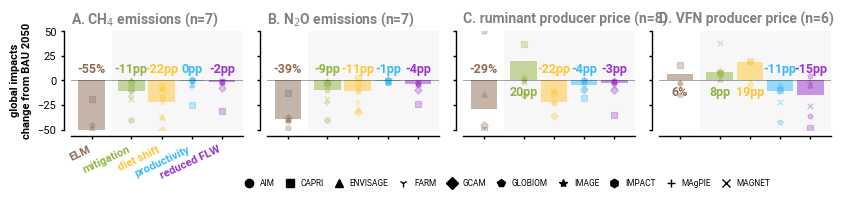

In [24]:
afont = {'fontsize' : 9, 'weight':'regular'} # scenario titles
bfont = {'fontsize' : 9, 'weight':'bold'} # medians
cfont = {'fontsize' : 8, 'weight':'regular'} #change labels
xfont = {'fontsize' : 8, 'weight':'bold'} #x labels

pfont = {'fontsize' : 10,'weight':'bold'} # title
hfont = {'fontsize' : 10,'color':'grey','weight':'bold'} # title

variables = {'CH$_4$ emissions' : {'variable': 'ECH4',
                                        'item': 'AGR',
                                        'region': 'WLD'},
            'N$_2$O emissions' : {'variable': 'EN2O',
                                        'item': 'AGR',
                                        'region': 'WLD'},
            'ruminant producer price' : {'variable': 'XPRP',
                                        'item': 'RUM',
                                        'region': 'WLD'},
            'VFN producer price' : {'variable': 'XPRP',
                                'item': 'VFN',
                                        'region': 'WLD'},

             }

models_markers = {
    'AIM': 'o',        # circle
    'CAPRI': 's',      # square
    'ENVISAGE': '^',   # triangle_up
    'FARM': '1',       # three point asterisk
    'GCAM': 'D',       # diamond
    'GLOBIOM': 'p',    # pentagon
    'IMAGE': '*',      # star
    'IMPACT': 'h',     # hexagon
    'MAgPIE': '+',     # plus
    'MAGNET': 'x'      # x
}

driver_style = {
                    'DIET': '#ffc430',
                    'PROD': '#38b9fa',
                    'WAST': 'darkorchid',# ,
                    'MITI': '#91b342',
                    'ELM': '#8C6D54'# '#f21b3f'#'#af79cb',
}
region_labels = {
   'CAN': 'Canada',
   'USA': 'United States',
   'BRA': 'Brazil', 
   'CHN': 'China',
   'IND': 'India',
   'OSA': 'Other South and Central America',
   'EUR': 'Europe',
   'FSU': 'Eastern Europe, Caucasus,\nCentral Asia',
   'MEN': 'Middle East and North Africa',
   'SSA': 'Sub-Saharan Africa',
   'SEA': 'South-East Asia',
   'OAS': 'Other Asia',
   'ANZ': 'Australia and New Zealand',
   'WLD': 'Global'
}
variable_label ={'XPRP': 'Producer Price',
                 'XPRC': 'Consumer Price',
                 'PROD': 'Production',
                 'EMIS': 'Total Emissions',
                 'LAND': 'Land use'

}

value_type = 'percent_change_BAU'
normalized = False
effect = 'total'
driver_order = ['MITI','DIET','PROD','WAST']
models = dc_df_l.model.unique()

scatter_alpha = 0.3
scatter_size = 10
box_width = 0.35
elm_x = 0
box_gap = 0.05
elm_gap = 0.35
x_gap = box_width/2+0.1
x_ticklabels = ['ELM', 'mitigation','diet shift','productivity','reduced FLW']
colors =  np.hstack([[driver_style['ELM']],[driver_style[driver] for driver in driver_order]])

zero_line = 0

col = 4
row = int(len(variables)/col)

r=0
#####################################
## DECOMPOSITION ANALYSIS RESULTS: ##
#####################################

fig = plt.figure(figsize=(8.5,row*2))
r=0
# region = 'WLD'
for i, v in enumerate(variables):
    variable = variables[v]['variable']
    item = variables[v]['item']
    region = variables[v]['region']
    fdf = dc_df_l[(dc_df_l.variable==variable) &
                (dc_df_l.region.isin([region])) &
                (dc_df_l.item==item) & #.isin(items)) &
                (dc_df_l.value_type==value_type) &
                (dc_df_l.normalized==normalized) &
                (dc_df_l.driver.isin(driver_order))&
                (dc_df_l.model.isin(models))]
    ax = fig.add_subplot(row,col,i+1)

    plot_decomposition_bar(region,variable,ax)
    ax.set_title(f"{string.ascii_uppercase[i]}. {v} (n={len(fdf.model.unique())})",loc='left',y=1,x=0,**hfont)

    if (i==0) or (i==4):
        ax.set_xticklabels(x_ticklabels,**xfont)
        ax.tick_params(axis='x',length=2)
        for tick_label, color in zip(ax.get_xticklabels(), colors):
            tick_label.set_color(color)
            tick_label.set_rotation(25)
            tick_label.set_horizontalalignment('right')
        if i==0:
            ax.set_ylabel("global impacts\nchange from BAU 2050",**xfont)
        else: # it should be i==4
            ax.set_ylabel("regional producer price\nchange from BAU 2050",**xfont)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylabel('')


    # r+=1
    # Create legend handles
legend_elements = []
for model, marker in models_markers.items():
    legend_elements.append(mlines.Line2D([], [], color='black', marker=marker, 
                                       linestyle='None', markersize=6, label=model))

# Create legend with 2 rows
legend = fig.legend(handles=legend_elements, ncol=10, loc='lower center', frameon=False,bbox_to_anchor=(0.6, 0), 
                    columnspacing=0.8,handletextpad=0.3, fontsize=6)

plt.subplots_adjust(wspace=-0.5,hspace=1,bottom=0.2)

fig.tight_layout()

save_name = f'{base_filename}_decomposition-SI-{time.strftime("%Y%m%d", time.localtime())}.png'
plt.savefig(pjoin(si_dir,save_name),transparent=True,bbox_inches='tight', dpi=300)

save_name = f'{base_filename}_decomposition-SI-{time.strftime("%Y%m%d", time.localtime())}.pdf'
plt.savefig(pjoin(si_dir,save_name),transparent=True,bbox_inches='tight', dpi=300)